## This project understand how the student's performance (test score) is affected by other variables such as Gender ,Ethnicity,parental level of education,Lunch and test preparartion course 

2.1 import data and required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [6]:
df=pd.read_csv('Studentsperformance.csv')

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [16]:
print("Categories in 'gender' variable: ",end="")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ",end="")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end="")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ",end="")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end="")
print(df['test preparation course'].unique())


Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [17]:
## define numerical and categorical features 
numerical_feature=[features for features in df.columns if df[features].dtype!='O']
categorical_features=[features for features in df.columns if df[features].dtype=='O']

print('we have {} numerical features : {}'.format(len(numerical_feature),numerical_feature))
print('we have {} categorical features:{}'.format(len(categorical_features),categorical_features))

we have 3 numerical features : ['math score', 'reading score', 'writing score']
we have 5 categorical features:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [18]:
## Adding total score and average 

df['Total_Score']=df['math score']+df['reading score']+df['writing score']
df['Average']=df['Total_Score']/3

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full=df[df['reading score']==100]['Average'].count()
writing_full=df[df['writing score']==100]['Average'].count()
math_full=df[df['math score']==100]['Average'].count()

print(f'Number of students with full marks in mAths:{math_full}')
print(f"Number of students with full marks in writting:{writing_full}")
print(f"Number of students with full marks in reading: {reading_full}")


Number of students with full marks in mAths:7
Number of students with full marks in writting:14
Number of students with full marks in reading: 17


In [23]:
reading_less_20=df[df['reading score'] <=20]['Average'].count()
writing_less_20=df[df['writing score'] <=20]['Average'].count()
math_less_20=df[df['math score'] <=20]['Average'].count()

print(f'Number of students with less than 20 marks in Maths:{math_less_20}')
print(f'Number of students with less than 20 marks in Maths:{writing_less_20}')
print(f'Number of students with less than 20 marks in Maths:{reading_less_20}')



Number of students with less than 20 marks in Maths:4
Number of students with less than 20 marks in Maths:3
Number of students with less than 20 marks in Maths:1


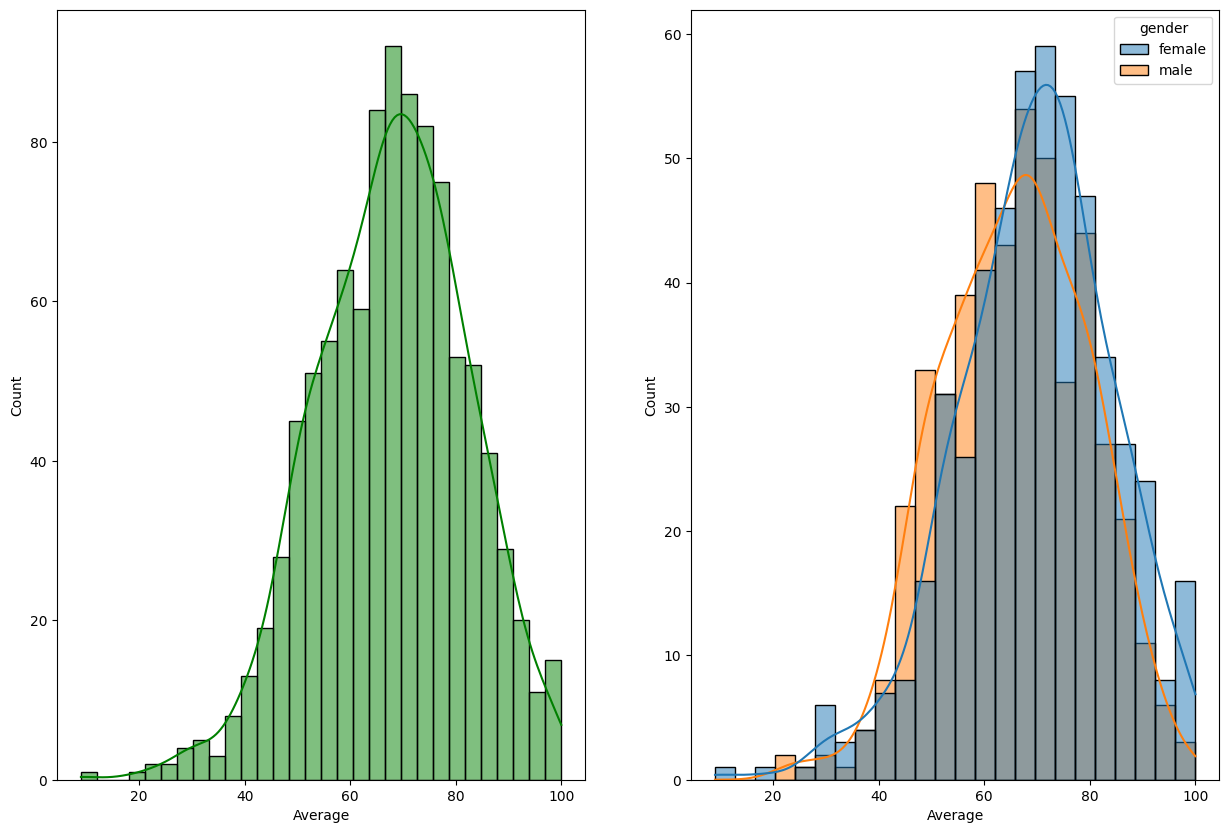

In [28]:
pyplot.figure(figsize=(15, 10))
pyplot.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
pyplot.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
pyplot.show()